<a href="https://www.kaggle.com/code/vedatgul/feature-engineering-with-diabetes-dataset?scriptVersionId=124675667" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  <span style="color:#2D7680"> Feature Engineering with Diabetes Dataset</span>

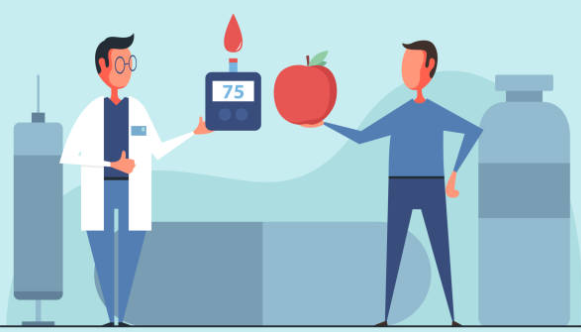

 # <span style="color:#2D7680"> Feature Engineering </span>

A large part of data science processes are data cleaning and variable engineering. It is aimed to clean the raw data, extract new features from the related data and transform the variables that are not suitable for entering the model. Thanks to the approaches obtained, you will acquire the necessary infrastructure to make the data set suitable for entering a machine learning model.

 # <span style="color:#2D7680"> Table of Contents </span>
 
[<span style="color:#2D7680"> 1. Examine the Dataset </span>](#Exa)

[<span style="color:#2D7680"> 2. Data Preparation </span>](#Dat)

[<span style="color:#2D7680"> 3. Create new variables </span>](#Cre)

[<span style="color:#2D7680"> 4. Analyzing variables </span>](#Ana)

[<span style="color:#2D7680"> 5. Encoding Operations </span>](#Enc)

[<span style="color:#2D7680"> 6. Modelling </span>](#Mod)

[<span style="color:#2D7680"> 7. Conclusion </span>](#Con)

# <span style="color:#2D7680"> 1. Examine the Dataset </span> <a class="anchor" id="Exa"></a>

The dataset is part of the large dataset held at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA. in the USA
On **Pima Indian women** aged 21 and over living in Phoenix, the 5th largest city in the State of Arizona.
Data used for diabetes research.
The target variable is specified as **"outcome"**; 1 indicates positive diabetes test result, 0 indicates negative.

**Short explanation of titles from dataset:**

* **Pregnancies:** Number of pregnancies
* **Glucose:** 2-hour plasma glucose concentration in the oral glucose tolerance test
* **Blood Pressure:** Blood Pressure (Small blood pressure) (mm Hg)
* **SkinThickness:** Skin Thickness
* **Insulin:** 2-hour serum insulin (mu U/ml)
* **DiabetesPedigreeFunction:**(2 hour plasma glucose concentration in oral glucose tolerance test)
* **BMI:** Body mass index
* **Age:** Age (years)
* **Outcome:** Have the disease (1) or not (0)

 # <span style="color:#2D7680"> 2. Data Preparation </span> <a class="anchor" id="Dat"></a>

In [1]:
# Install Libraries

import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width',500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Read Data

df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
# Clear data replace 0 with empty values NaN.

for col in df.columns:
    if col not in ( "Outcome","Pregnancies", "DiabetesPedigreeFunction"):
        df[col] = df[col].replace(to_replace=0, value=np.NaN)
    else:
        df[col]

In [4]:
# Specifying ull values

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
# Filling blanks with mean values

df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)

In [6]:
# Checking for null values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 # <span style="color:#2D7680"> 3. Create new variables  </span> <a class="anchor" id="Cre"></a>

In [7]:
# Numeric to Categorical: Converting Numeric Variables to Categorical Variables

# Separation of age variable into 3 groups "young","mature","senior"

df['Newage'] = pd.cut(x=df['Age'], bins=[0,30,46,81],labels = ["young","mature","senior"])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Newage
0,6,148.000,72.000,35.000,155.548,33.600,0.627,50,1,senior
1,1,85.000,66.000,29.000,155.548,26.600,0.351,31,0,mature
2,8,183.000,64.000,29.153,155.548,23.300,0.672,32,1,mature
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature


In [8]:
# This variable classifies glucose values as: Low(0-70), Normal(70-99), Hidden(99-126) and High(126-200)

NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")

df["NewGlucose"] = NewGlucose

df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Newage,NewGlucose
0,6,148.000,72.000,35.000,155.548,33.600,0.627,50,1,senior,Secret
1,1,85.000,66.000,29.000,155.548,26.600,0.351,31,0,mature,Normal
2,8,183.000,64.000,29.153,155.548,23.300,0.672,32,1,mature,Secret
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,Normal
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,Secret


In [9]:
# Diabetes Pedigree Function: A function that scores the probability of diabetes based on family history

df["DiabetesPedigreeFunction"].describe()

df.loc[df["DiabetesPedigreeFunction"]<0.33,"Genetics_risk"]="low"

df.loc[(df["DiabetesPedigreeFunction"]>=0.33) & (df["DiabetesPedigreeFunction"]<0.66),"Genetics_risk"]="high"

df.loc[(df["DiabetesPedigreeFunction"]>=0.66),"Genetics_risk"]="very high"

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Newage,NewGlucose,Genetics_risk
0,6,148.000,72.000,35.000,155.548,33.600,0.627,50,1,senior,Secret,high
1,1,85.000,66.000,29.000,155.548,26.600,0.351,31,0,mature,Normal,high
2,8,183.000,64.000,29.153,155.548,23.300,0.672,32,1,mature,Secret,very high
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,Normal,low
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,Secret,very high


In [10]:
# People were classified as Underweight (0-18.5), Healthy(18.5–25), Overweight(25–30), or Obese(30+) based on their body mass index

df.loc[(df["BMI"]<18.5),"BMI_risk"]="Underweight"

df.loc[(df["BMI"]>=18.5) & (df["BMI"]<24.9),"BMI_risk"]="Healthy"

df.loc[(df["BMI"]>=24.9) & (df["BMI"]<29.9),"BMI_risk"]="Overweight"

df.loc[(df["BMI"]>=29.9) & (df["BMI"]<34.9),"BMI_risk"]="Obesity_1"

df.loc[(df["BMI"]>=34.9),"BMI_risk"]="Obesity_2"

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Newage,NewGlucose,Genetics_risk,BMI_risk
0,6,148.000,72.000,35.000,155.548,33.600,0.627,50,1,senior,Secret,high,Obesity_1
1,1,85.000,66.000,29.000,155.548,26.600,0.351,31,0,mature,Normal,high,Overweight
2,8,183.000,64.000,29.153,155.548,23.300,0.672,32,1,mature,Secret,very high,Healthy
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,Normal,low,Overweight
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,Secret,very high,Obesity_2


In [11]:
# Blood Pressure: Blood pressure higher than 90 is risky

df["BloodPressure_risk"]=[1 if i>90 else 0 for i in df["BloodPressure"]]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Newage,NewGlucose,Genetics_risk,BMI_risk,BloodPressure_risk
0,6,148.000,72.000,35.000,155.548,33.600,0.627,50,1,senior,Secret,high,Obesity_1,0
1,1,85.000,66.000,29.000,155.548,26.600,0.351,31,0,mature,Normal,high,Overweight,0
2,8,183.000,64.000,29.153,155.548,23.300,0.672,32,1,mature,Secret,very high,Healthy,0
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,Normal,low,Overweight,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,Secret,very high,Obesity_2,0


In [12]:
# Insulin value between 16-166 is “Normal”,  in other cases it is “Abnormal”

df.loc[(df["Insulin"]<16),"Insulin_risk"]="Abnormal"

df.loc[(df["Insulin"]>=16) & (df["Insulin"]<=166),"Insulin_risk"]="Normal"

df.loc[(df["Insulin"]>166),"Insulin_risk"]="Abnormal"

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Newage,NewGlucose,Genetics_risk,BMI_risk,BloodPressure_risk,Insulin_risk
0,6,148.000,72.000,35.000,155.548,33.600,0.627,50,1,senior,Secret,high,Obesity_1,0,Normal
1,1,85.000,66.000,29.000,155.548,26.600,0.351,31,0,mature,Normal,high,Overweight,0,Normal
2,8,183.000,64.000,29.153,155.548,23.300,0.672,32,1,mature,Secret,very high,Healthy,0,Normal
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,Normal,low,Overweight,0,Normal
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,Secret,very high,Obesity_2,0,Abnormal


# <span style="color:#2D7680"> 4. Analyzing variables  </span> <a class="anchor" id="Ana"></a>

In [13]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    # 1- Categorical variables
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # 2- Numeric but actually categorical (class)
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                        dataframe[col].dtypes != "O"]
    
    # 3 - Categorical but actually each cardinal, that is, unique
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                        dataframe[col].dtypes == "O"]
    
    # 4 - Collect the cat_cols and num_but_cat variables
    cat_cols = cat_cols + num_but_cat
    
    # 5- Subtract the cardinal variable from cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [14]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 15
cat_cols: 7
num_cols: 8
cat_but_car: 0
num_but_cat: 4


# <span style="color:#2D7680"> 5. Encoding Operations   </span> <a class="anchor" id="Enc"></a>

It provides LabelEncoder and One-Hot Encoding approaches, which enable us to represent data with numerical expressions before entering machine learning, and variable standardization and variable transformation operations that significantly affect model performance in distance-based machine learning algorithms.

In [15]:
# If a categorical variable to be Label Encoding has two classes, this process is specially called Binary Encoding

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]
binary_cols

['Insulin_risk']

In [16]:
# Convert categorical variable into dummy/indicator variables

df=pd.get_dummies(df, columns=binary_cols, drop_first=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Newage,NewGlucose,Genetics_risk,BMI_risk,BloodPressure_risk,Insulin_risk_Normal
0,6,148.000,72.000,35.000,155.548,33.600,0.627,50,1,senior,Secret,high,Obesity_1,0,1
1,1,85.000,66.000,29.000,155.548,26.600,0.351,31,0,mature,Normal,high,Overweight,0,1
2,8,183.000,64.000,29.153,155.548,23.300,0.672,32,1,mature,Secret,very high,Healthy,0,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,Normal,low,Overweight,0,1
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,Secret,very high,Obesity_2,0,0


In [17]:
# Rare cases are ignored at a rate of 0.01

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [18]:
df=rare_encoder(df, 0.01)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Newage,NewGlucose,Genetics_risk,BMI_risk,BloodPressure_risk,Insulin_risk_Normal
0,6,148.000,72.000,35.000,155.548,33.600,0.627,50,1,senior,Secret,high,Obesity_1,0,1
1,1,85.000,66.000,29.000,155.548,26.600,0.351,31,0,mature,Normal,high,Overweight,0,1
2,8,183.000,64.000,29.153,155.548,23.300,0.672,32,1,mature,Secret,very high,Healthy,0,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,Normal,low,Overweight,0,1
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,Secret,very high,Obesity_2,0,0


In [19]:
# One-Hot Encoding, many machine learning models cannot work with categorical data. That's why one-hot encoding is called binary (0-1) conversion of categorical variables with more than two categories.

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [20]:
cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, cols)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressure_risk,Insulin_risk_Normal,Newage_mature,Newage_senior,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,Genetics_risk_low,Genetics_risk_very high,BMI_risk_Obesity_1,BMI_risk_Obesity_2,BMI_risk_Overweight,BMI_risk_Rare
0,6,148.000,72.000,35.000,155.548,33.600,0.627,50,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0
1,1,85.000,66.000,29.000,155.548,26.600,0.351,31,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
2,8,183.000,64.000,29.153,155.548,23.300,0.672,32,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0


In [21]:
# Standardize for numeric variables.

for col in num_cols:
    transformer = RobustScaler().fit(df[[col]])
    df[col] = transformer.transform(df[[col]])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressure_risk,Insulin_risk_Normal,Newage_mature,Newage_senior,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,Genetics_risk_low,Genetics_risk_very high,BMI_risk_Obesity_1,BMI_risk_Obesity_2,BMI_risk_Overweight,BMI_risk_Rare
0,0.600,0.765,-0.013,0.835,0.000,0.132,0.665,1.235,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0
1,-0.400,-0.790,-0.388,-0.022,0.000,-0.637,-0.056,0.118,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
2,1.000,1.630,-0.513,0.000,0.000,-1.000,0.783,0.176,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0
3,-0.400,-0.691,-0.388,-0.879,-1.808,-0.473,-0.537,-0.471,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
4,-0.600,0.494,-2.013,0.835,0.366,1.176,5.008,0.235,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0


# <span style="color:#2D7680"> 6. Modelling   </span> <a class="anchor" id="Mod"></a>

In [22]:
# Split Data

Y=df['Outcome']
X=df.drop('Outcome',axis=1)

In [23]:
# Spliting X and Y : creation of train and test data

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0,stratify=df['Outcome'])

In [24]:
# Model Building
# Logistic regression is useful for situations where you want to predict the presence or absence of a characteristic or outcome based on the presence of a feature or outcome

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [25]:
# Get prediction

y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [26]:
# Accuracy score is used to measure the model performance in terms of measuring the ratio of sum of true positive and true negatives out of all the predictions made

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,y_predict)
print("Accuracy : ",round(accuracy,2)*100,'%')

Accuracy :  80.0 %


 # <span style="color:#2D7680"> 7. Conclusion   </span> <a class="anchor" id="Con"></a>

Users with common features with the movie selections of the randomly selected user were determined.
The correlations of these users with the randomly selected user were calculated.
Considering the correlation coefficient and the votes given to the films, the 5 films with the highest scores were selected.

 # <span style="color:#2D7680"> Keep in Touch!  </span>

You can follow my the other social media adresses to see this kind of works!

* [GitHub](https://github.com/Vedatgul)
* [LinkedIn](https://www.linkedin.com/in/vedat-gül)
* [Medium](https://medium.com/@veribilimi35)